# This notebook explains the steps involved in building a weather classification model using various machine learning algorithms.


# Import necessary libraries


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



# Load the dataset and display the first few rows of the dataset

In [42]:
weather_data = pd.read_csv('weather_classification_data.csv')

print(weather_data.head())



   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


# Handle missing values using median imputation

In [45]:

imputer = SimpleImputer(strategy='median')
weather_data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']] = imputer.fit_transform(weather_data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']])



# Convert categorical variables to numerical variables using one-hot encoding
# Normalize/standardize numerical features
# Split the data into training and testing sets


In [48]:

categorical_features = ['Cloud Cover', 'Season', 'Location']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
weather_data = pd.concat([weather_data.drop(categorical_features, axis=1), pd.DataFrame(onehot_encoder.fit_transform(weather_data[categorical_features]).toarray(), columns=onehot_encoder.get_feature_names_out(categorical_features))], axis=1)

scaler = StandardScaler()
weather_data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']] = scaler.fit_transform(weather_data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']])

X_train, X_test, y_train, y_test = train_test_split(weather_data.drop('Weather Type', axis=1), weather_data['Weather Type'], test_size=0.2, random_state=42)




# Perform exploratory data analysis (EDA)


        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  1.320000e+04  1.320000e+04  1.320000e+04       1.320000e+04   
mean  -6.136505e-17  3.445056e-16  2.368476e-17       1.098112e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00       1.000038e+00   
min   -2.538158e+00 -2.412206e+00 -1.423215e+00      -1.679256e+00   
25%   -8.701176e-01 -5.799313e-01 -6.994626e-01      -1.084490e+00   
50%    1.076993e-01  6.384073e-02 -1.204609e-01       1.363456e-01   
75%    6.828857e-01  7.571337e-01  5.309161e-01       8.876291e-01   
max    5.169340e+00  1.995157e+00  5.597181e+00       1.732823e+00   

       Atmospheric Pressure      UV Index  Visibility (km)  Cloud Cover_clear  \
count          1.320000e+04  1.320000e+04     1.320000e+04       13200.000000   
mean          -5.307539e-16  4.844610e-18     3.768030e-18           0.162045   
std            1.000038e+00  1.000038e+00     1.000038e+00           0.368506   
min           -5.530053e+00 -1.038715e+00    

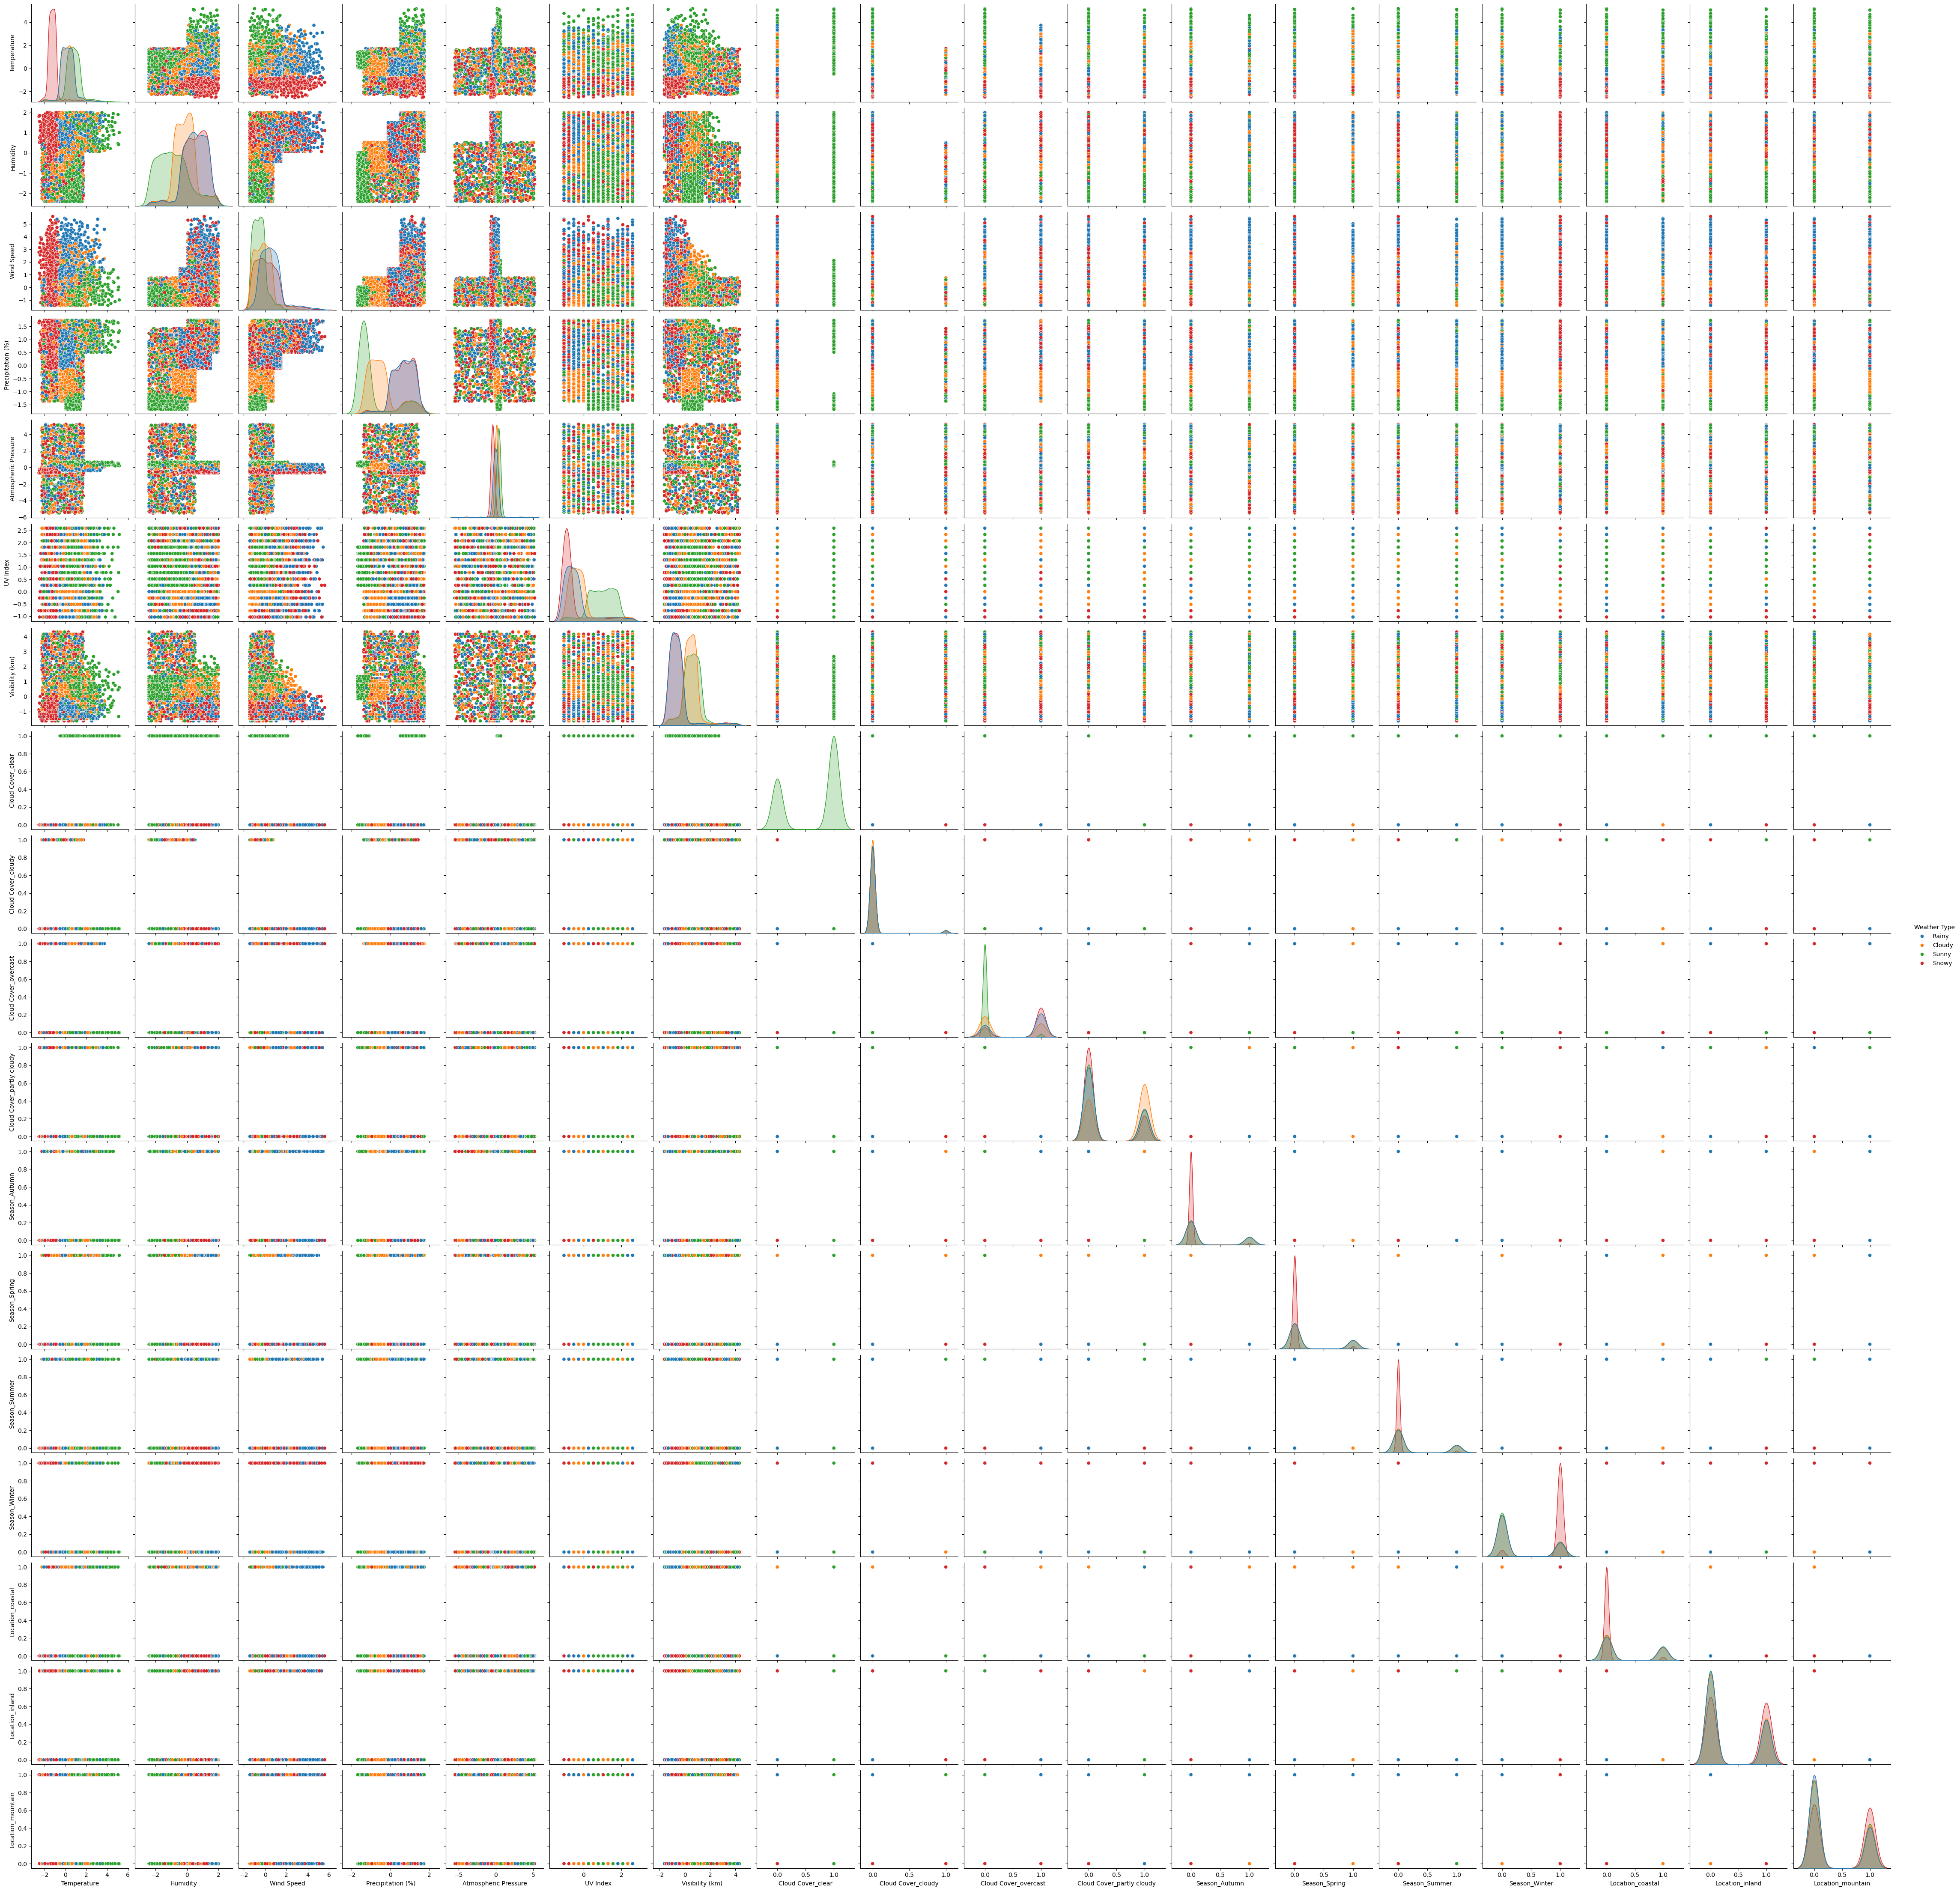

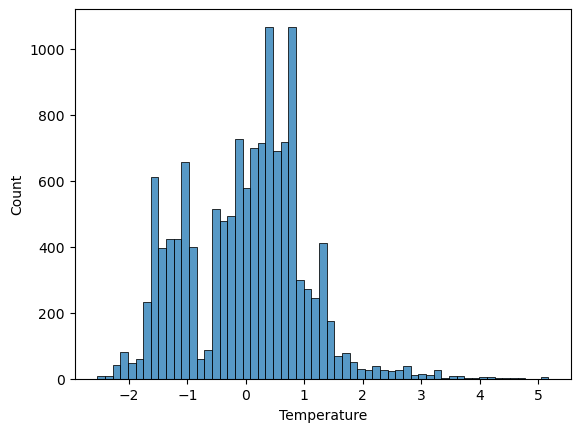

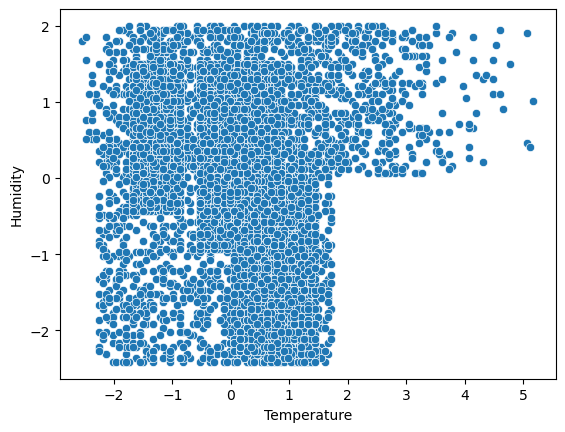

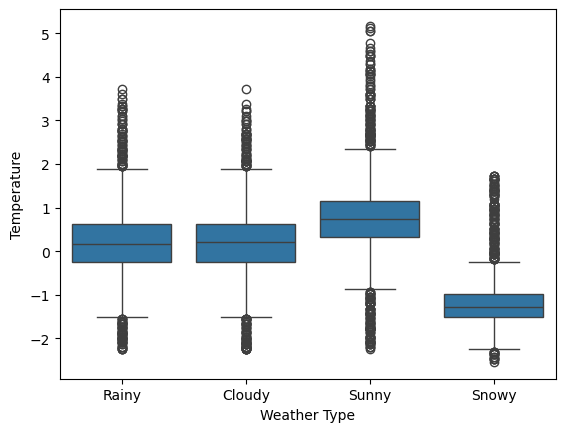

In [51]:

print(weather_data.describe())
sns.pairplot(weather_data, hue='Weather Type')
plt.show()
sns.histplot(weather_data['Temperature'])
plt.show()
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data)
plt.show()
sns.boxplot(x='Weather Type', y='Temperature', data=weather_data)
plt.show()



# Apply machine learning models with hyperparameter tuning
## Define hyperparameters for Logistic Regression and perform grid search


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
lr_pred = grid_search_lr.predict(X_test)



## Define hyperparameters for Decision Tree Classifier and perform grid search


In [57]:
param_grid_dt = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
dt_pred = grid_search_dt.predict(X_test)



## Define hyperparameters for Random Forest Classifier and perform grid search


In [60]:
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
rf_pred = grid_search_rf.predict(X_test)



# Evaluate model performance for each:
### Evaluate model performance for Logistic Regression
### Evaluate model performance for Decision Tree Classifier
### Evaluate model performance for Random Forest Classifier


In [63]:
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))

print("Decision Tree:")
print(classification_report(y_test, dt_pred))

print("Random Forest:")
print(classification_report(y_test, rf_pred))



Logistic Regression:
              precision    recall  f1-score   support

      Cloudy       0.79      0.82      0.80       651
       Rainy       0.83      0.82      0.83       647
       Snowy       0.87      0.94      0.90       701
       Sunny       0.93      0.82      0.87       641

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640

Decision Tree:
              precision    recall  f1-score   support

      Cloudy       0.89      0.89      0.89       651
       Rainy       0.87      0.92      0.89       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.95      0.89      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Random Forest:
              precision    recall  f1-score   support

      Cloudy       0.88 

## Compare model performance based on accuracy scores


In [66]:
print("Model Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Model Comparison:
Logistic Regression Accuracy: 0.8511363636363637
Decision Tree Accuracy: 0.9121212121212121
Random Forest Accuracy: 0.9147727272727273


n
# Weather Classification Model Conclusion

The performance of three machine learning models—Logistic Regression, Decision Tree, and Random Forest—was evaluated on a weather classification dataset. The models were assessed based on precision, recall, f1-score, and accuracy. Here is a brief summary of the results:

## Logistic Regression
- **Accuracy:** 85.11%
- **Precision:** 
  - Cloudy: 0.79
  - Rainy: 0.83
  - Snowy: 0.87
  - Sunny: 0.93
- **Recall:** 
  - Cloudy: 0.82
  - Rainy: 0.82
  - Snowy: 0.94
  - Sunny: 0.82
- **F1-Score:** 
  - Cloudy: 0.80
  - Rainy: 0.83
  - Snowy: 0.90
  - Sunny: 0.87

## Decision Tree
- **Accuracy:** 91.21%
- **Precision:** 
  - Cloudy: 0.89
  - Rainy: 0.87
  - Snowy: 0.94
  - Sunny: 0.95
- **Recall:** 
  - Cloudy: 0.89
  - Rainy: 0.92
  - Snowy: 0.94
  - Sunny: 0.89
- **F1-Score:** 
  - Cloudy: 0.89
  - Rainy: 0.89
  - Snowy: 0.94
  - Sunny: 0.92

## Random Forest
- **Accuracy:** 91.48%
- **Precision:** 
  - Cloudy: 0.88
  - Rainy: 0.90
  - Snowy: 0.93
  - Sunny: 0.95
- **Recall:** 
  - Cloudy: 0.90
  - Rainy: 0.91
  - Snowy: 0.94
  - Sunny: 0.90
- **F1-Score:** 
  - Cloudy: 0.89
  - Rainy: 0.91
  - Snowy: 0.94
  - Sunny: 0.92

## Key Findings
1. **Accuracy Comparison:** 
   - Logistic Regression: 85.11%
   - Decision Tree: 91.21%
   - Random Forest: 91.48%

2. **Overall Performance:**
   - The Random Forest classifier demonstrated the highest accuracy at 91.48%, closely followed by the Decision Tree classifier at 91.21%. Logistic Regression had the lowest accuracy at 85.11%.
   - Random Forest and Decision Tree models consistently outperformed Logistic Regression across all performance metrics (precision, recall, and f1-score).

3. **Class-wise Performance:**
   - **Cloudy and Sunny:** Logistic Regression performed relatively lower in precision and recall compared to Decision Tree and Random Forest.
   - **Rainy:** All models performed similarly in precision, but Logistic Regression lagged slightly in recall.
   - **Snowy:** All models performed well, with Logistic Regression having slightly lower precision and recall.

## Conclusion
The Decision Tree and Random Forest classifiers are more effective for weather classification in this dataset, providing higher accuracy and better overall performance metrics than Logistic Regression. Between the two, Random Forest slightly edges out Decision Tree, making it the best model for this task. For practical implementation, the Random Forest classifier is recommd due to its robustness and higher accuracy in classifying weather types.
```